<a href="https://colab.research.google.com/github/drpetros11111/AI_Sciencs/blob/main/Intro_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x1, x2, w1, w2, b = 6, 5, 3, 1, -25

x1*w1 + x2*w2 + b

-2

In [ ]:
import numpy as np

def perceptron(x,W,b):
    return np.matmul(x,W)+b >= 0


x = [6,2,4,2,7,8]
W = [3,1,1,9,5,3]
b = -25
perceptron(x,W,b)

True

In [ ]:
#Perceptron Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

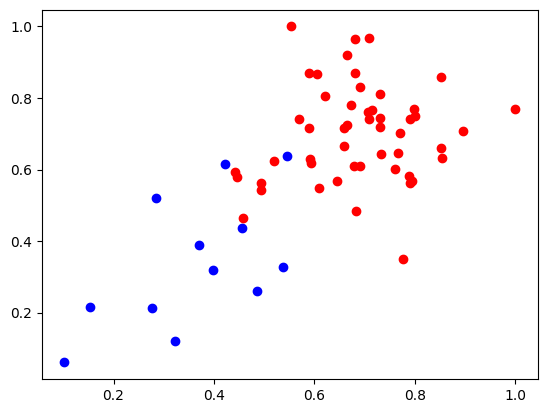

In [ ]:
df = pd.read_excel(r"/content/data.xlsx", header=None)
X = np.array([df[0], df[1]])
y = np.array(df[2])

plt.scatter(X[0][np.where(y==1)], X[1][np.where(y==1)], color='blue')
plt.scatter(X[0][np.where(y==0)], X[1][np.where(y==0)], color='red')

plt.show()

In [ ]:
def prediction(x, W, b):
    return np.matmul(x,W)+b >= 0

def perceptronStep(X, y, W, b, lr):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)

        if y[i] - y_hat == 1:
            W[0] += X[i][0] * lr
            W[1] += X[i][1] * lr
            b += lr
        elif y[i] - y_hat == -1:
            W[0] -= X[i][0] * lr
            W[1] -= X[i][1] * lr
            b -= lr

    return W, b

def trainPerceptron(X, y, lr, n_epochs):
    W = np.array(np.random.rand(2,1))
    b = 2
    lines = []

    for i in range(n_epochs):
        lines.append((-W[0]/W[1], -b/W[1]))
        W, b = perceptronStep(X, y, W, b, lr)

    return lines



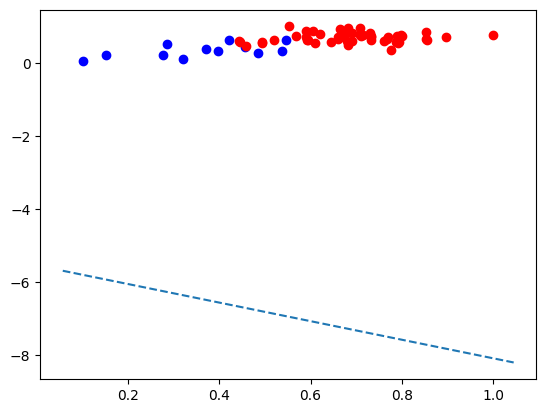

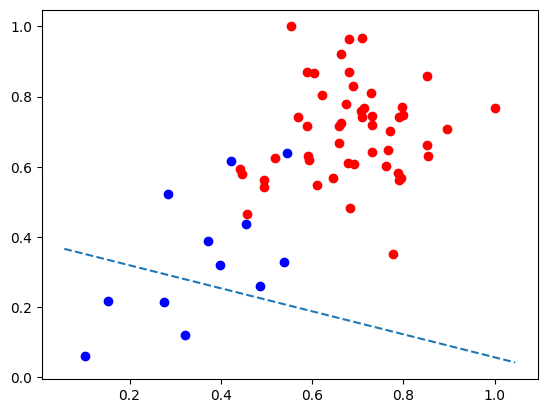

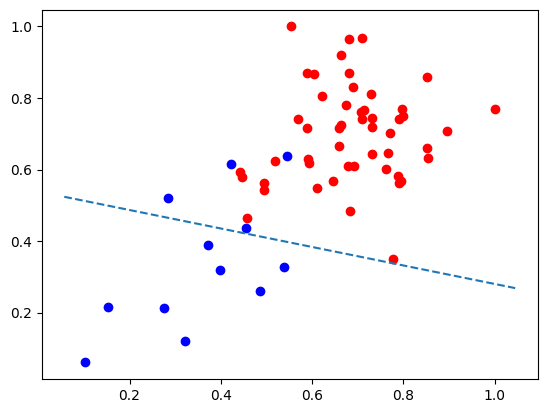

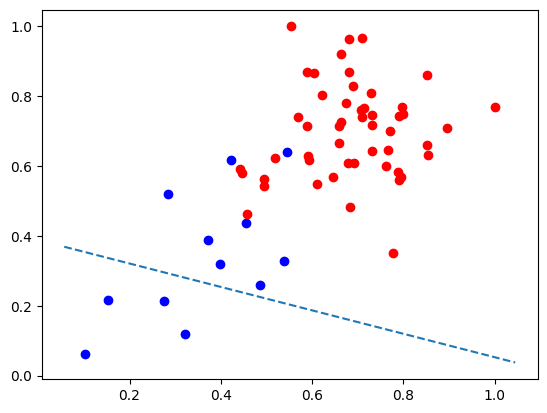

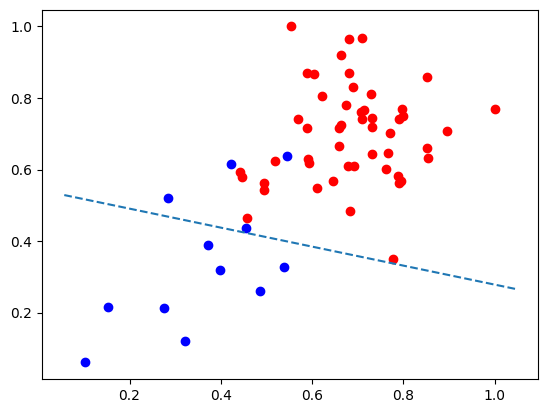

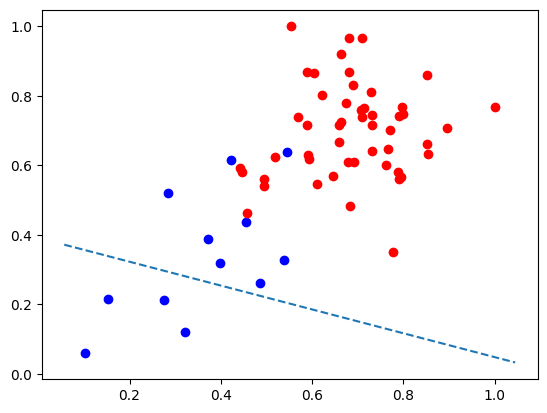

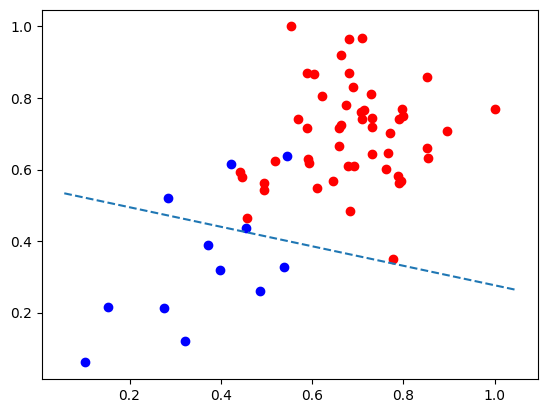

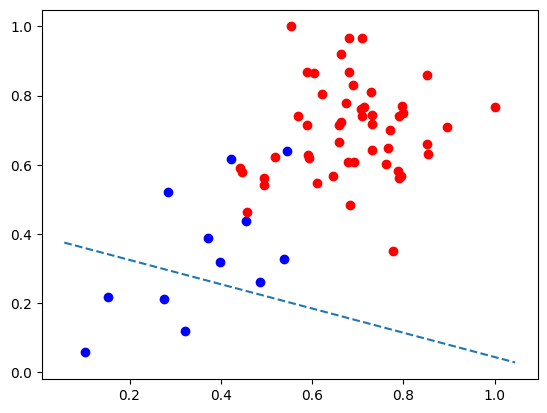

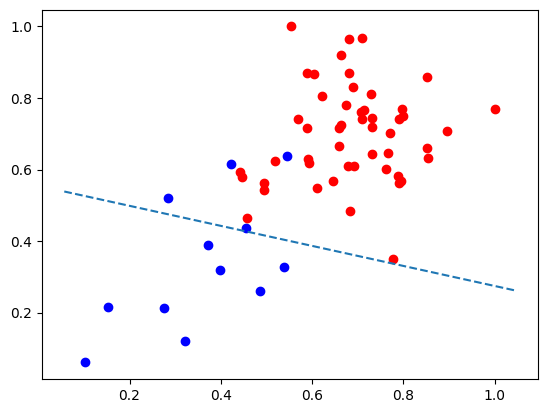

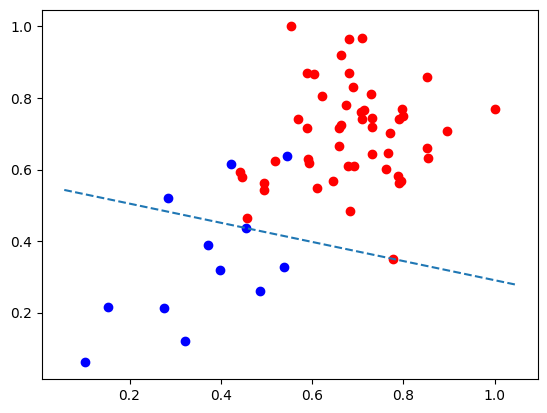

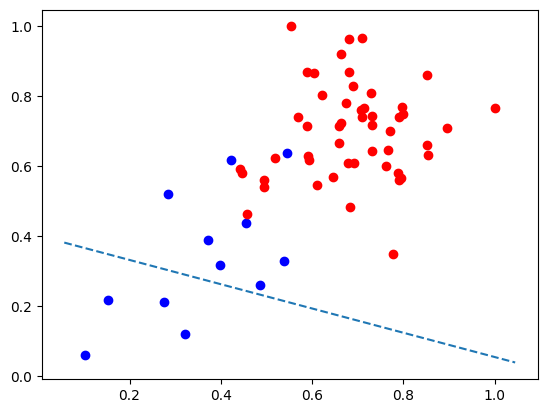

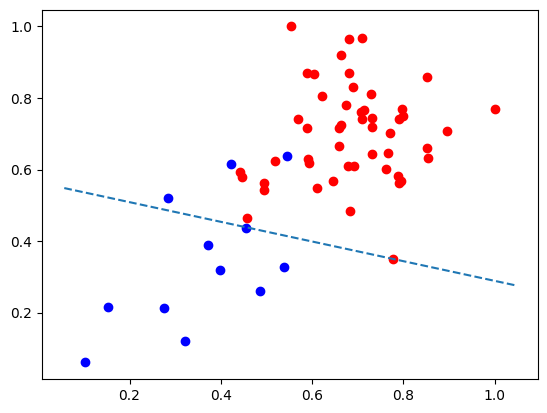

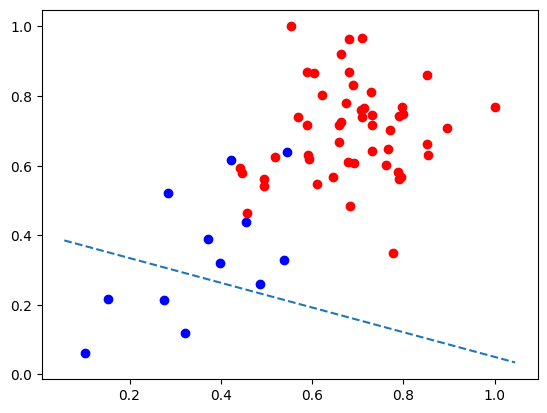

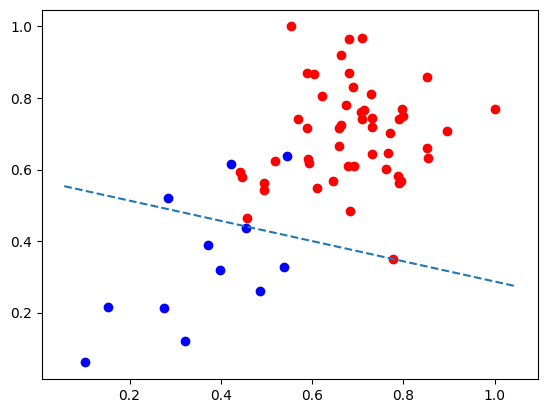

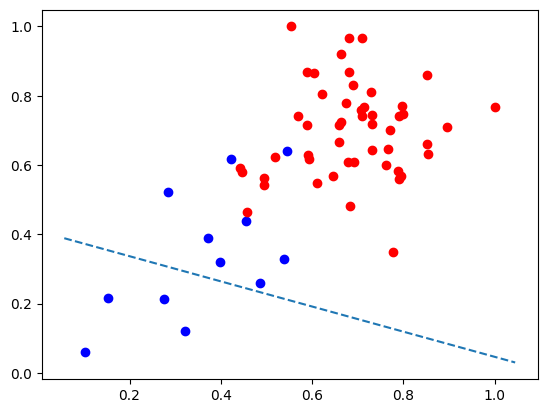

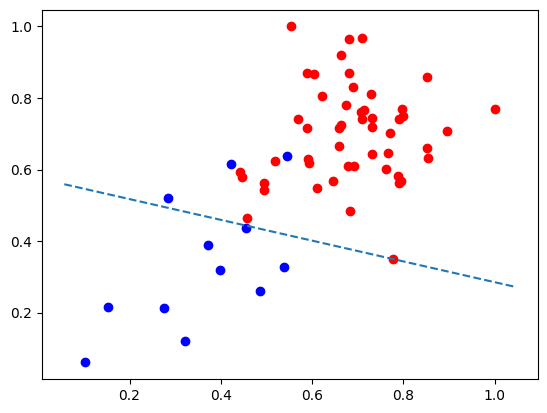

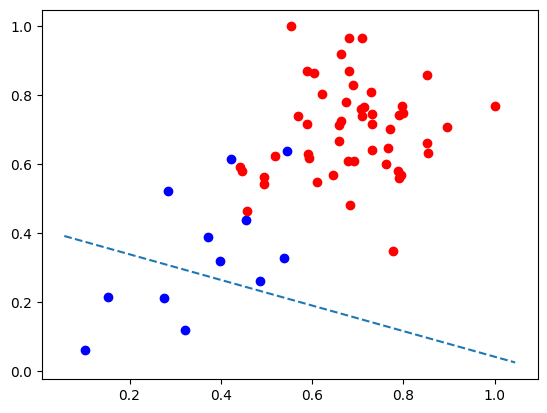

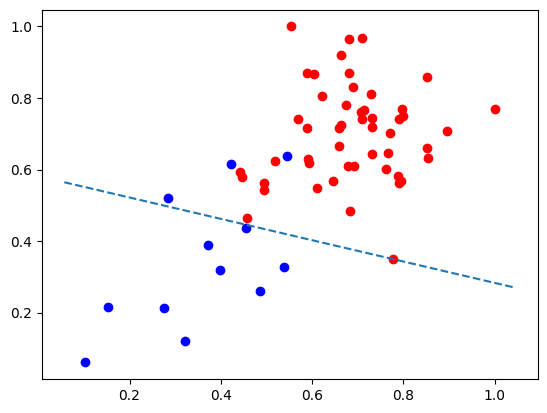

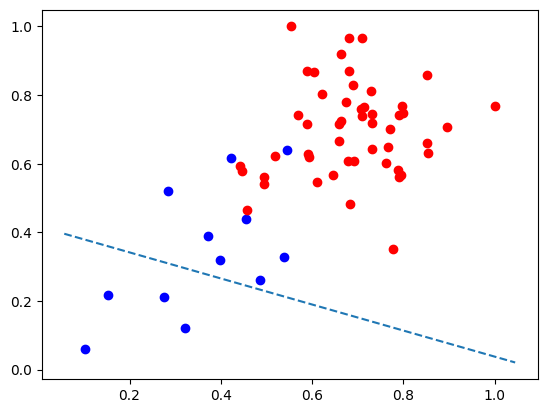

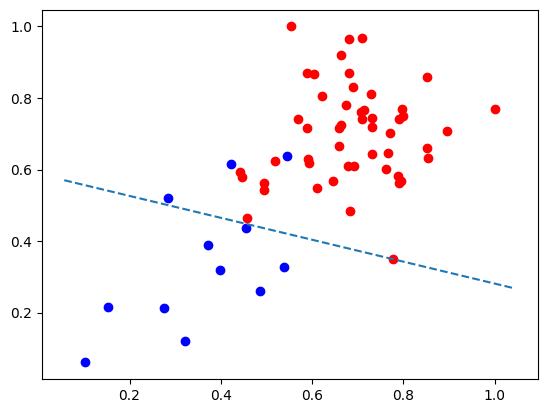

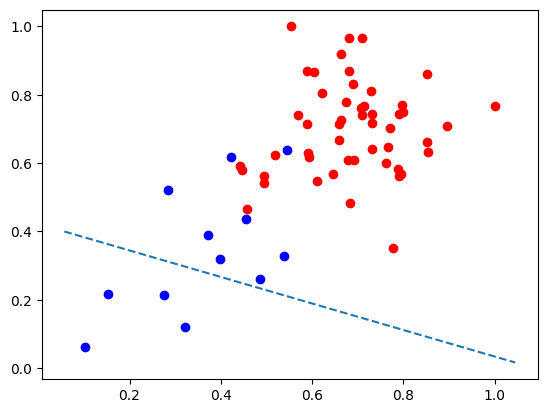

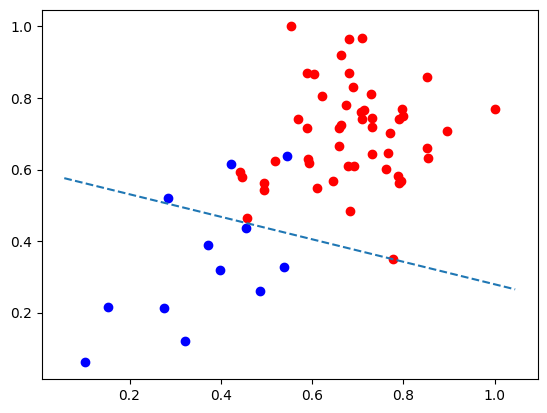

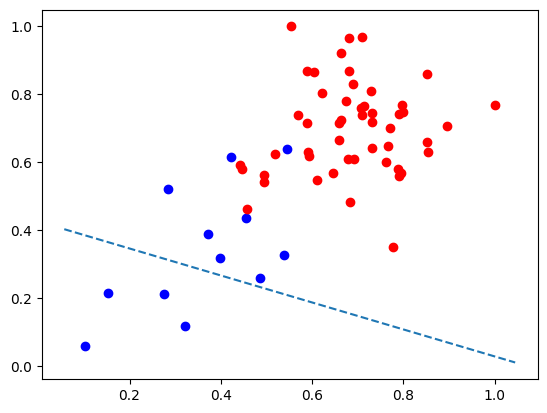

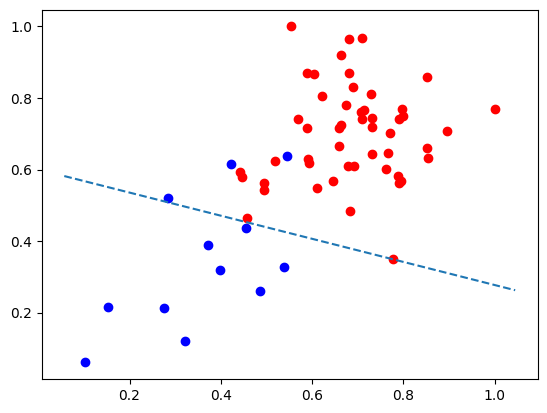

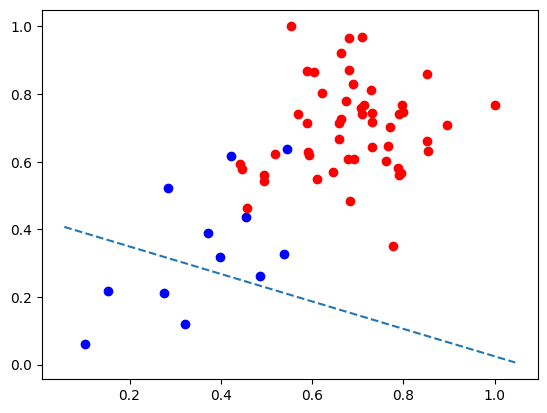

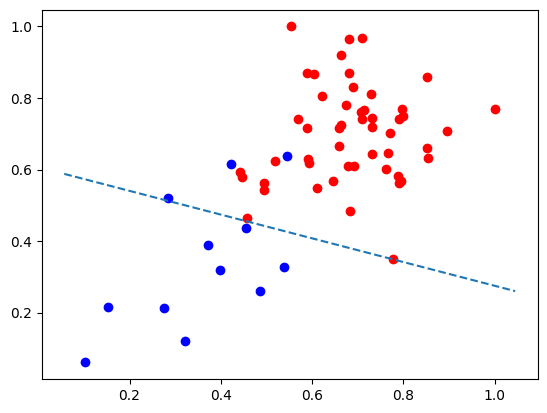

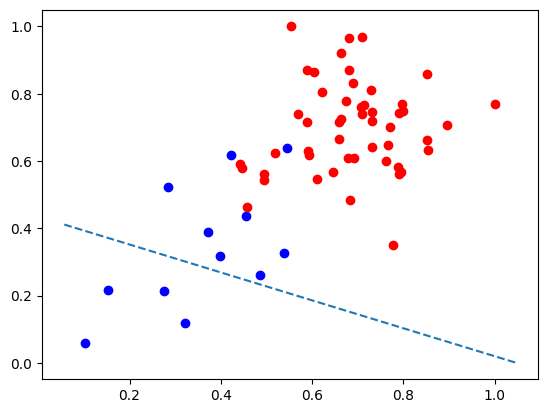

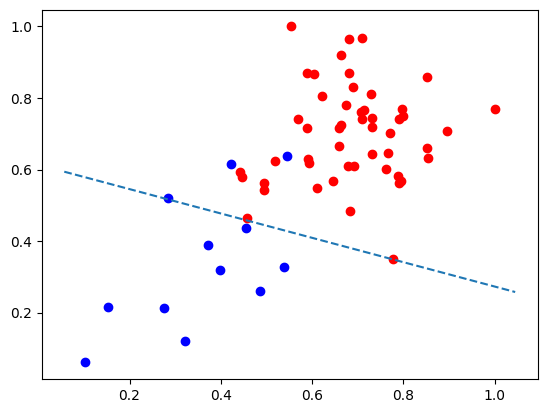

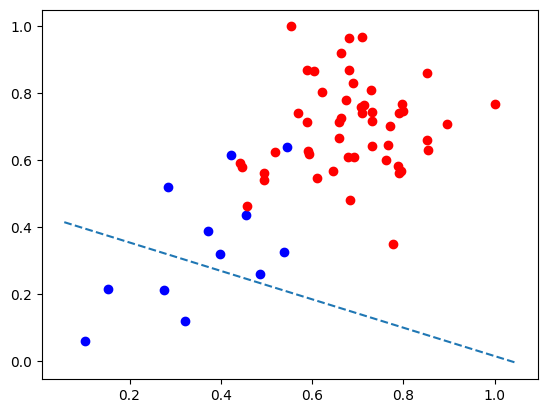

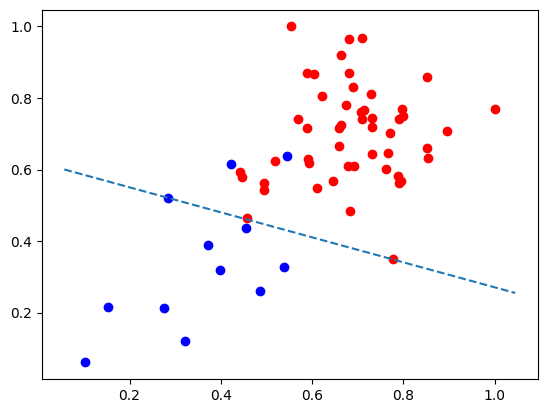

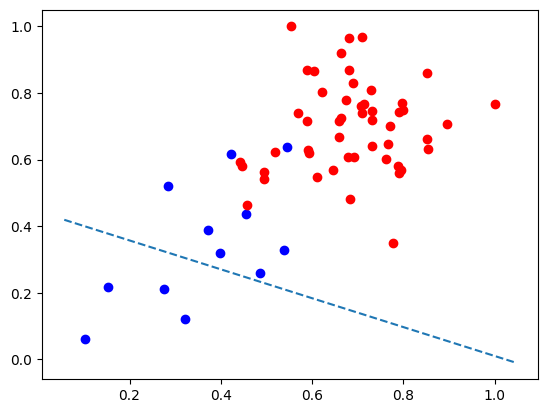

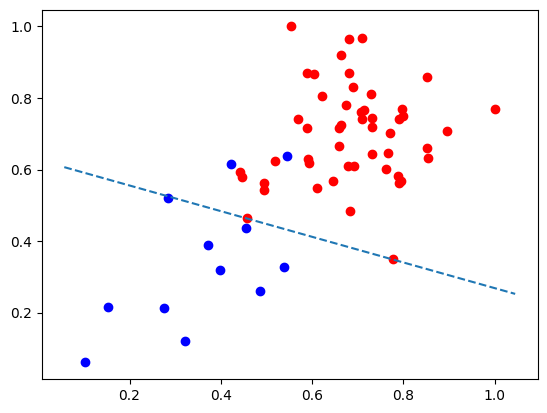

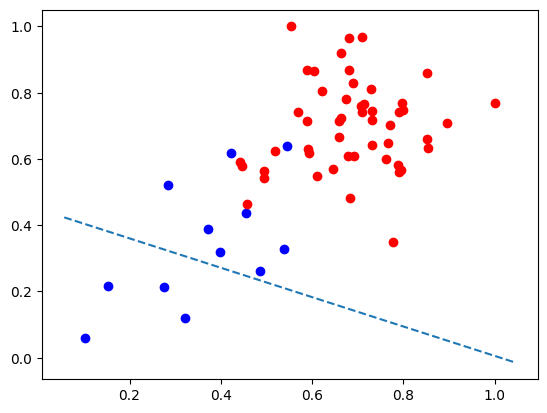

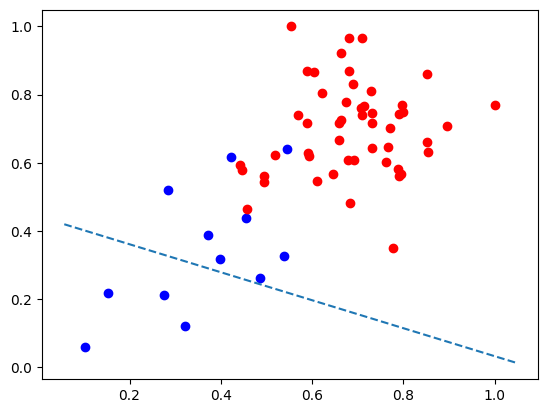

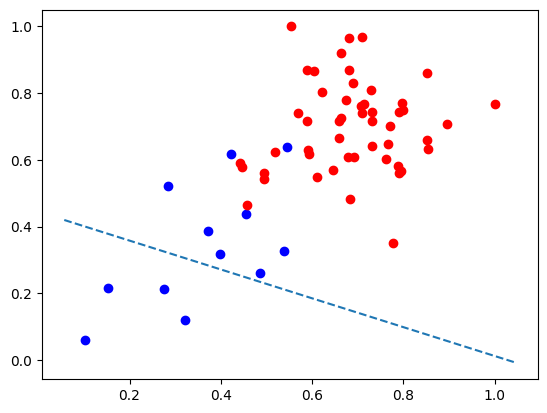

In [ ]:
res = trainPerceptron(X.T, y, lr=0.1, n_epochs=35)



def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


for i in range(len(res)):
    plt.scatter(X[0][np.where(y==1)], X[1][np.where(y==1)], color='blue')
    plt.scatter(X[0][np.where(y==0)], X[1][np.where(y==0)], color='red')
    abline(res[i][0], res[i][1])
    plt.show()

In [ ]:
#Softmax

In [ ]:
import numpy as np

def softmax(L):
    exps = np.exp(L)
    sumOfExps = sum(exps)

    res = []
    for i in exps:
        res.append(i/sumOfExps)
    return res

softmax([2,1,0])

[0.6652409557748219, 0.24472847105479764, 0.09003057317038046]

In [ ]:
import numpy as np

def softmax(L):
    exps = np.exp(L)
    sumOfExps = sum(exps)

    return [i/sumOfExps for i in exps]

softmax([2,1,0])

[0.6652409557748219, 0.24472847105479764, 0.09003057317038046]

In [ ]:
import numpy as np

# Define the function and its derivative
def func(x):
    return x**2

def deriv(x):
    return 2*x

# Parameters
learning_rate = 0.1
training_epochs = 100
initial_guess = 10  # Starting point

# Gradient Descent
localmin = initial_guess
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad

    if i % 10 == 0:
        print(f"Epoch {i}: x = {localmin}, f(x) = {func(localmin)}")

print(f"Local minimum occurs at x = {localmin}, f(x) = {func(localmin)}")


Epoch 0: x = 8.0, f(x) = 64.0
Epoch 10: x = 0.8589934592000003, f(x) = 0.7378697629483825
Epoch 20: x = 0.09223372036854777, f(x) = 0.008507059173023463
Epoch 30: x = 0.009903520314283045, f(x) = 9.807971461541694e-05
Epoch 40: x = 0.001063382396627933, f(x) = 1.1307821214581668e-06
Epoch 50: x = 0.00011417981541647683, f(x) = 1.3037030248540721e-08
Epoch 60: x = 1.2259964326927117e-05, f(x) = 1.5030672529752548e-10
Epoch 70: x = 1.3164036458569655e-06, f(x) = 1.7329185588255109e-12
Epoch 80: x = 1.4134776518227082e-07, f(x) = 1.9979190722022372e-14
Epoch 90: x = 1.5177100720513518e-08, f(x) = 2.3034438628061196e-16
Local minimum occurs at x = 2.0370359763344878e-09, f(x) = 4.1495155688809995e-18


# **Function Definition:**

func(x): The function
$$𝑓
(
𝑥
)
=
𝑥
2
f(x)=x
2
 $$

deriv(x): The derivative of the function,

$$𝑓
′
(
𝑥
)
=
2
𝑥
f
′
 (x)=2x$$



---


##**Parameters**

**learning_rate**

The step size for each iteration of gradient descent.

**training_epochs**

The number of iterations to run the gradient descent algorithm.

**initial_guess**

The starting point for the gradient descent algorithm.
Gradient Descent Loop:

**localmin**

The current estimate of the local minimum, starting from initial_guess.

In each iteration, the gradient grad is calculated using the derivative function deriv.

The estimate localmin is updated by moving in the direction opposite to the gradient (hence the subtraction).


---


**Output**

The value of x and the function f(x) are printed every 10 epochs.

Finally, the estimated local minimum and the corresponding function value are printed.

This example demonstrates how to use gradient descent to find the local minimum of a simple quadratic function.

The key part is defining both the function and its derivative correctly before running the gradient descent algorithm.

In [ ]:
#Logistic Regression

In [ ]:
import numpy as np

def crossEntropy(y, output):
    return -y*np.log(output) - (1-y) * np.log(1-output)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def outputFormula(x, W, bias):
    return sigmoid(np.dot(x,W)+bias)

# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'green', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

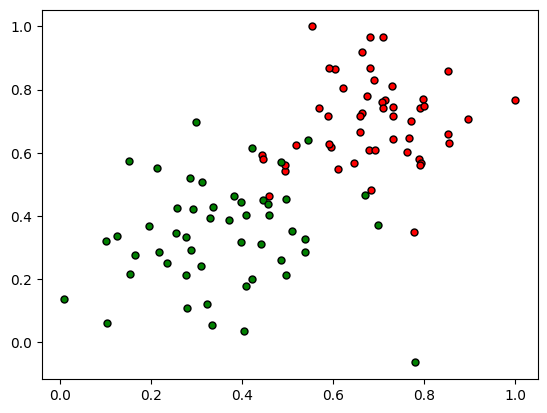

In [ ]:
data = pd.read_csv('/content/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

#**Plotting the data**

**Reading the CSV File**


    data = pd.read_csv('/content/data.csv', header=None)

**Purpose**

Load data from a CSV file into a Pandas DataFrame.

**Details**

    pd.read_csv('/content/data.csv', header=None)

This function reads the CSV file located at /content/data.csv.

    header=None

This parameter indicates that the CSV file does not contain a header row, so Pandas will treat the first row as data rather than column names.



---


**Extracting Features (X)**


    X = np.array(data[[0,1]])

**Purpose**

Extract the first two columns of the DataFrame as features and convert them into a NumPy array.

**Details**

data

    [[0, 1]]

Selects columns 0 and 1 from the DataFrame data.

    np.array(...)

Converts the selected columns into a NumPy array.

**Output**

X is a NumPy array containing the feature values from the first two columns of the CSV file.



---


**Extracting Labels (y)**

    y = np.array(data[2])

**Purpose**

Extract the third column of the DataFrame as labels and convert it into a NumPy array.

**Details**

    data[2]

Selects column 2 from the DataFrame data.
np.array(...): Converts the selected column into a NumPy array.

**Output**

y is a NumPy array containing the label values from the third column of the CSV file.

**Note**
Single brackets (data[2]) return a pandas Series, which is then converted to a one-dimensional numpy array.

Double brackets (data[[2]]) return a pandas DataFrame, which is then converted to a two-dimensional numpy array.

Using single brackets in your snippet simplifies the conversion process and results in a one-dimensional numpy array, which is typically easier to work with for many numerical operations.
---
**Plotting Points**

    plot_points(X, y)

**Purpose**

Plot the data points based on the features and labels.

**Details**

    plot_points(X, y)

Calls a custom function plot_points (which is assumed to be defined elsewhere in the code) to plot the feature points (X) with their corresponding labels (y).

---
**Displaying the Plot**

    plt.show()

**Purpose**

Display the plot created by plot_points.

**Details**

    plt.show()

This function from the Matplotlib library displays the current figure or plot.

**Function Definition**

    def plot_points(X, y):

**Purpose**

This line defines a new function named plot_points that takes two arguments: X (features) and y (labels).

**Class Separation**

    class_0 = y == 0
    class_1 = y == 1

**Purpose**

These lines create **boolean masks** to separate data points into two classes based on the label y.

**Details**

    class_0 = y == 0

**Creates a boolean array where each element is True** if the corresponding label in y is 0 and False otherwise.

    class_1 = y == 1

Similarly, creates a boolean array where each element is True if the corresponding label in y is 1 and False otherwise.


**Plotting Class 0 Points**

    plt.scatter(X[class_0, 0], X[class_0, 1], color='red', label='Class 0')

**Purpose**

 Plots the data points belonging to class 0.

**Details**

    X[class_0, 0]

Selects the first feature of the data points where class_0 is True.

    X[class_0, 1]

Selects the second feature of the data points where class_0 is True.

    plt.scatter(...)

Creates a scatter plot of the selected data points.

    color='red'

Colors the points red.

    label='Class 0'

Labels this set of points as 'Class 0' for the legend.

**Plotting Class 1 Points**

    plt.scatter(X[class_1, 0], X[class_1, 1], color='blue', label='Class 1')

**Purpose**

Plots the data points belonging to class 1.

**Details**

    X[class_1, 0]

Selects the first feature of the data points where class_1 is True.

    X[class_1, 1]

Selects the second feature of the data points where class_1 is True.

    plt.scatter(...)

Creates a scatter plot of the selected data points.

    color='blue'

Colors the points blue.

    label='Class 1'

Labels this set of points as 'Class 1' for the legend.

**Labeling the Axes**

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

**Purpose**

Sets the labels for the x-axis and y-axis.

**Details**

    plt.xlabel('Feature 1')

Labels the x-axis as 'Feature 1'.

    plt.ylabel('Feature 2')

Labels the y-axis as 'Feature 2'.

**Adding a Legend**

    plt.legend()

**Purpose**

Adds a legend to the plot to differentiate between the classes.

**Details**

**plt.legend()**

Displays the legend using the labels provided in the plt.scatter function calls.

**Calling the Function**

    plot_points(X, y)

**Purpose**

Calls the plot_points function with the X and y data to create the plot.

**Displaying the Plot**

    plt.show()

**Purpose**

Displays the plot on the screen.

**Details**

    plt.show()

This function from the Matplotlib library is used to display the current figure or plot.

----
----
**Summary1**

The code defines a function plot_points that takes in feature data X and labels y, and creates a scatter plot to visualize the data.

 The points are colored based on their class label (red for class 0 and blue for class 1), with appropriate axis labels and a legend.

 The plot is then displayed using plt.show().

Here's the full code with proper indentation:

python
Copy code
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    class_0 = y == 0
    class_1 = y == 1

    plt.scatter(X[class_0, 0], X[class_0, 1], color='red', label='Class 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], color='blue', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

# Example usage
data = pd.read_csv('/content/data.csv', header=None)
X = np.array(data[[0, 1]])
y = np.array(data[2])

plot_points(X, y)
plt.show()
Ensure you have Matplotlib and Pandas installed and the CSV file at the specified path for this to work correctly.

----
----
**Summary2**

The snippet reads a CSV file without a header into a Pandas DataFrame.

It extracts the first two columns as features (X) and the third column as labels (y), converting them to NumPy arrays.

It then calls a custom function plot_points to plot these features and labels.

Finally, it uses plt.show() to display the plot.

To ensure this snippet runs correctly, the following assumptions are made:

The file /content/data.csv exists and is correctly formatted.

The custom function plot_points is defined elsewhere in the code and can handle the inputs X and y.

Matplotlib is imported and available as plt in the environment where this code is executed.

---
**Example**

Here's a full example including necessary imports and a sample implementation of plot_points:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

# Assuming the file path and content
    data = pd.read_csv('/content/data.csv', header=None)
    X = np.array(data[[0, 1]])
    y = np.array(data[2])

# Sample implementation of plot_points (depends on specific use case)

    def plot_points(X, y):
       class_0 = y == 0
       class_1 = y == 1

        plt.scatter(X[class_0, 0], X[class_0, 1], color='red', label='Class 0')

        plt.scatter(X[class_1, 0], X[class_1, 1], color='blue', label='Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()

     plot_points(X, y)

    plt.show()

This example includes a basic implementation of plot_points that plots points of two classes (0 and 1) in different colors.

Adjust the plot_points function based on your specific needs and class labels

**Scatter Plot for Class 0**

    plt.scatter(X[class_0, 0], X[class_0, 1], color='red', label='Class 0')

    plt.scatter: This function creates a scatter plot.

    X[class_0, 0]

This selects the first feature (x-axis values) of the samples that belong to class_0. class_0 is a boolean array that indicates which samples belong to class 0.

    X[class_0, 1]

This selects the second feature (y-axis values) of the samples that belong to class_0.

    color='red'

This sets the color of the points to red for class 0.
label='Class 0': This sets the label for the legend to "Class 0".
Scatter Plot for Class 1:

    plt.scatter(X[class_1, 0], X[class_1, 1], color='blue', label='Class 1')

Similar to the first plt.scatter call, but for class_1:

X[class_1, 0]: This selects the first feature (x-axis values) of the samples that belong to class_1.

X[class_1, 1]: This selects the second feature (y-axis values) of the samples that belong to class_1.

color='blue': This sets the color of the points to blue for class 1.
label='Class 1': This sets the label for the legend to "Class 1".
Setting x-axis Label:

    plt.xlabel('Feature 1')

This sets the label for the x-axis to "Feature 1".
Setting y-axis Label:

    plt.ylabel('Feature 2')

This sets the label for the y-axis to "Feature 2".
Displaying the Legend:

    plt.legend()

This displays the legend on the plot, which will show the labels "Class 0" and "Class 1" corresponding to the red and blue points, respectively.

#**Summary**

The provided snippet creates a scatter plot to visualize two classes of data points. It plots points belonging to class_0 in red and points belonging to class_1 in blue.

The x-axis represents the first feature, and the y-axis represents the second feature. The legend differentiates between the two classes.

This visualization helps in understanding how the two classes are distributed based on their features.

In [ ]:
import numpy as np

def error_formula(y, output):
    return -y*np.log(output) - (1-y) * np.log(1-output)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def outputFormula(x, W, bias):
    return sigmoid(np.dot(x,W)+bias)

def update_weights(x, y, weights, bias, lr):
    output = outputFormula(x, weights, bias)
    d_error = y - output
    weights += lr * d_error * x
    bias += lr * d_error
    return weights, bias

In [ ]:
np.random.seed(44)
epochs = 400
lr = 0.001

def train(features, targets, epochs, lr):
    errors = []
    n_records, n_features = features.shape

    weights = np.random.normal(size = n_features)
    bias = 0

    for e in range(epochs):
        for x, y in zip(features, targets):
            output = outputFormula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, lr)

        out = outputFormula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)

        if e % (epochs/10) == 0:
            print("\n ========Epoch",e,"=========")
            print("Train Loss", loss)
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)

            display(-weights[0]/weights[1], -bias/weights[1])


    #Solution Boudary
    plt.title("Solution Boudary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    plot_points(features, targets)
    plt.show()


    #Plotting the error
    plt.title("Error Plot")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Error")
    plt.plot(errors)
    plt.show()

#Setting the slope & the bias

    plt.title("Solution Boundary")

*Purpose*

This line sets the title of the plot.
Details:

    plt.title("Solution Boundary")

The plt.title function from the Matplotlib library is used to set the title of the plot to "Solution Boundary".

**Displaying the Decision Boundary**

    display(-weights[0]/weights[1], -bias/weights[1], 'black')

**Purpose**

This line is intended to display the decision boundary of the classifier on the plot.

**Details**

    display(...)

This function seems to be intended to plot a line representing the decision boundary.

    -weights[0]/weights[1]

This represents the slope of the decision boundary line.

In a linear classifier, the weights determine the orientation of the decision boundary.

    -bias/weights[1]

This represents the intercept of the decision boundary line.

    'black'

This sets the color of the decision boundary line to black.

Understanding the Decision Boundary:
In a linear classifier, the decision boundary is determined by the equation:

$$𝑤
0
𝑥
0
+
𝑤
1
𝑥
1
+
𝑏
=
0
w
0
​
 x
0
​
 +w
1
​
 x
1
​
 +b=0$$

where

$$𝑤0​$$

  and

$$𝑤1​$$

  are the weights,

$$𝑏$$

is the bias, and

$$𝑥0​$$

  and

$$𝑥1$$

​
  are the feature values.

To plot this line in a 2D space (with

$$𝑥0​$$

  on the x-axis and

$$𝑥1​$$

  on the y-axis), we can rearrange this equation to the form of a line

$$𝑦
=
𝑚
𝑥
+
𝑐$$

$$y=mx+c$$

$$𝑥
1
=
−
𝑤
0
𝑤
1
𝑥
0
−
𝑏
𝑤
1
x
1
​$$
 $$=−
w
1
​$$

$$w0$$
​

​
$$x0$$
​
 $$−w1​$$

$$b​$$

Here,

$$−𝑤0$$
$$𝑤1−w1​$$

$$w0​$$

  is the slope (m) and

$$−𝑏𝑤1−w1$$

$$b​$$

  is the intercept (c).


Corrected Example

Assuming we want to plot the decision boundary using Matplotlib, the corrected code might look something like this:


    import matplotlib.pyplot as plt
    import numpy as np

# Assuming weights and bias are defined
    weights = np.array([1, -2])
    bias = 0.5

# Function to plot decision boundary
    def plot_decision_boundary(weights, bias):
       # Define the x range
       x_values = np.array([min_x, max_x])  # Replace min_x and max_x with appropriate values
    
       # Calculate corresponding y values
       y_values = -weights[0]/weights[1] * x_values - bias/weights[1]
    
       # Plot the decision boundary
        plt.plot(x_values, y_values, 'black')
         plt.title("Solution Boundary")
         plt.xlabel('Feature 1')
         plt.ylabel('Feature 2')
         plt.legend()

# Example usage

plot_decision_boundary(weights, bias)
plt.show()

In this corrected example:

plot_decision_boundary is a function that takes weights and bias as input and plots the decision boundary.

x_values are the x-coordinates over which we want to plot the decision boundary.

y_values are calculated based on the decision boundary equation.

plt.plot(x_values, y_values, 'black') plots the decision boundary as a black line.

plt.title("Solution Boundary") sets the plot title.

plt.show() displays the plot.

Ensure you replace min_x and max_x with appropriate values for your data.


 ========Epoch 0 =========
Train Loss 0.7629781006873365
Accuracy:  0.39

 ========Epoch 40 =========
Train Loss 0.6900271302025912
Accuracy:  0.54

 ========Epoch 80 =========
Train Loss 0.6531706581680742
Accuracy:  0.65

 ========Epoch 120 =========
Train Loss 0.6209598426349952
Accuracy:  0.72

 ========Epoch 160 =========
Train Loss 0.5918666784317981
Accuracy:  0.77

 ========Epoch 200 =========
Train Loss 0.5655487934084431
Accuracy:  0.82

 ========Epoch 240 =========
Train Loss 0.5417082210982661
Accuracy:  0.84

 ========Epoch 280 =========
Train Loss 0.5200698461273823
Accuracy:  0.85

 ========Epoch 320 =========
Train Loss 0.5003860942413646
Accuracy:  0.9

 ========Epoch 360 =========
Train Loss 0.48243699822656927
Accuracy:  0.89


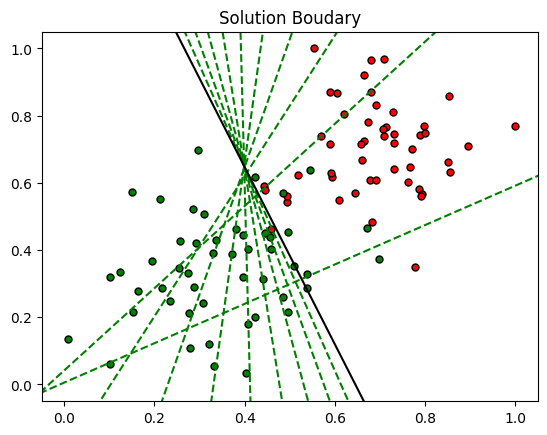

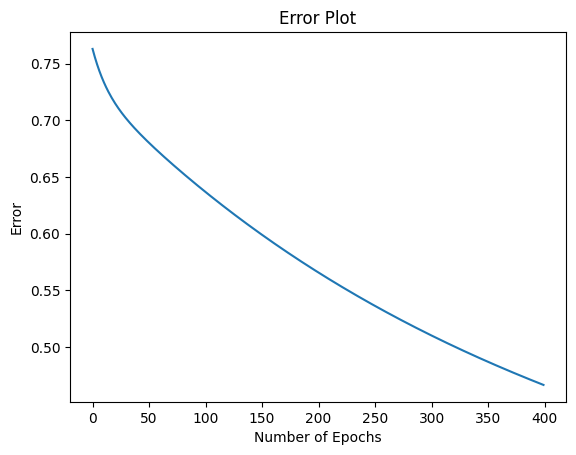

In [ ]:
train(X, y, epochs, lr)

# Neural Network

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/student_data.csv')

data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


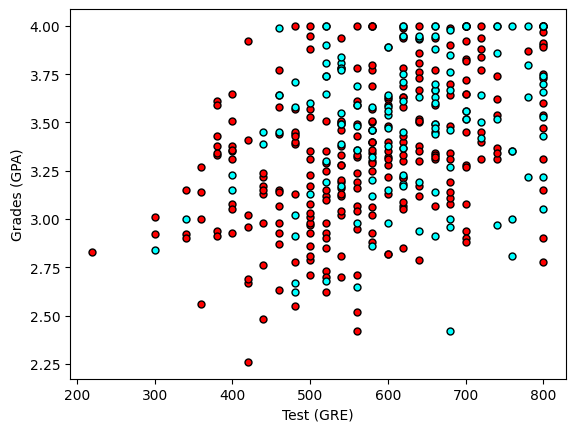

In [ ]:
import matplotlib.pyplot as plt

def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')

plot_points(data)
plt.show()

# **Explanation of the Plot**


---


1. Data Extraction:

**X = np.array(data[["gre","gpa"]])**

 Extracts the columns "gre" (Test scores) and "gpa" (Grades) from the DataFrame data and converts them into a NumPy array X.

 Each row in X represents a data point with features "gre" and "gpa".

    y = np.array(data["admit"])

Extracts the column "admit" (Admission decision, where 1 = admitted, 0 = rejected) from the DataFrame data and converts it into a NumPy array y.

Each element in y corresponds to the admission status of the corresponding row in X.

Understanding Double Brackets in Pandas DataFrame

**Single Bracket [ ]**

When using a single bracket [ ] with a string or list of strings inside, it selects a single column or a subset of columns from a DataFrame.

**Double Brackets [[ ]]**

When using double brackets [[ ]], it returns a DataFrame containing the selected columns, even if there's only one column selected.
---


**Separating Data**

**admitted = X[np.argwhere(y==1)]**

Uses np.argwhere(y==1) to find indices where y (admit) is 1 (admitted).

    X[np.argwhere(y==1)]

retrieves the rows in X where admission status is 1 (admitted) and stores them in admitted.

    rejected = X[np.argwhere(y==0)]

Similarly, uses np.argwhere(y==0) to find indices where y (admit) is 0 (rejected).

    X[np.argwhere(y==0)]

retrieves the rows in X where admission status is 0 (rejected) and stores them in rejected.

The function np.argwhere in the snippet

     X[np.argwhere(y==1)]

is used to find the indices of elements in the array y where the condition y == 1 is satisfied.

Let's break down its usage and functionality:

Understanding np.argwhere
----------------------------

Definition:

    np.argwhere(condition)

 is a NumPy function that returns the indices of elements that satisfy the condition in the form of a tuple of arrays, where each array contains the indices of one dimension.
Usage in the Snippet:

In the snippet

    X[np.argwhere(y==1)]:

y == 1: This is a boolean condition that checks which elements in the array y are equal to 1.

    np.argwhere(y==1)

This function call returns a NumPy array containing the indices where y equals 1.


    X[np.argwhere(y==1)]

Uses these indices to select rows from the array X. This effectively filters rows in X where the corresponding element in y is 1.
---


**Plotting**

    plt.scatter([s[0][0] for s in rejected], [s[0][1]

**Explanation of the Brackets (Continued)**

In the snippet:
    plt.scatter([s[0][0]

for s in rejected], [s[0][1] for s in rejected],

s=25, color='red', edgecolor='k')
[s[0][0] for s in rejected]:

This is a list comprehension that iterates over each element s in the rejected array.
s represents a single point in the rejected array.

    s[0]

accesses the first element of s. Since s is a 2D array (or list), s[0] gives us the first element of that array.

    s[0][0]

accesses the first element of the first element of s, which corresponds to the x-coordinate of the point.

Therefore,
    [s[0][0]
    
for s in rejected] constructs a list of x-coordinates of all points in rejected.

    [s[0][1]

for s in rejected]:

Similarly, this list comprehension constructs a list of y-coordinates of all points in rejected.

The

    s

parameter in

    plt.scatter

controls the size of the markers (points) on the scatter plot.

It accepts either a scalar or an array-like object that specifies the marker sizes.

Scalar

If s is a scalar (like s=25), all markers will have the same size.

Array-like

If s is an array-like object (such as a list or a NumPy array), each element in the array specifies the size of the corresponding marker.

This allows for variable marker sizes in the plot.

    s[0][1]

 accesses the second element of the first element of s, which corresponds to the y-coordinate of the point.


    for s in rejected], s = 25, color = 'red', edgecolor = 'k')

In the context of the snippet plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color='red', edgecolor='k'), the parameter edgecolor='k' specifies the color of the edges of the markers (or points) in the scatter plot. Here's what it means:

edgecolor Parameter in plt.scatter

The edgecolor parameter in plt.scatter controls the color of the edges of the markers (points) in the scatter plot.

It can accept various color specifications, including color names (like 'red', 'blue', 'green', etc.) or hexadecimal color codes ('#RRGGBB').

Understanding 'k' as a Color Code

    'k'

In Matplotlib and many other plotting libraries, 'k' represents the color black.

It's a shorthand notation for specifying the color, where 'k' stands for "black" (as "b" is already used for blue, "k" is used for black to avoid confusion with "b")

Plots the rejected points

    [s[0][0] for s in rejected] extracts the GRE scores (s[0][0])

from each row (s) in rejected.

    [s[0][1] for s in rejected]

extracts the GPA (s[0][1]) from each row (s) in rejected.

s = 25 sets the size of the markers.

color = 'red' sets the color of the markers to red.

edgecolor = 'k' sets the edge color of the markers to black.

    plt.scatter([s[0][0] for s in admitted], [s[0][1]
    
for s in admitted], s = 25, color = 'cyan', edgecolor = 'k'):

Plots the admitted points similarly, but in cyan color.

**Axes Labels**

    plt.xlabel('Test (GRE)')
Sets the x-axis label.

    plt.ylabel('Grades (GPA)')

Sets the y-axis label.

Calling plot_points and Showing the Plot
After defining plot_points, the function is called with plot_points(data).

This function call plots the points based on the admission status (admitted or rejected) onto the current plot.

    plot_points(data)
 ## Call the plot_points function with the dataset 'data'

    plt.show()         # Show the plot

---    
**Summary**

The plot_points function extracts and separates data points based on their admission status (admit), then plots them using plt.scatter.

It helps visualize how GRE scores (x-axis) and GPA (y-axis) correlate with admission decisions (admitted or rejected).

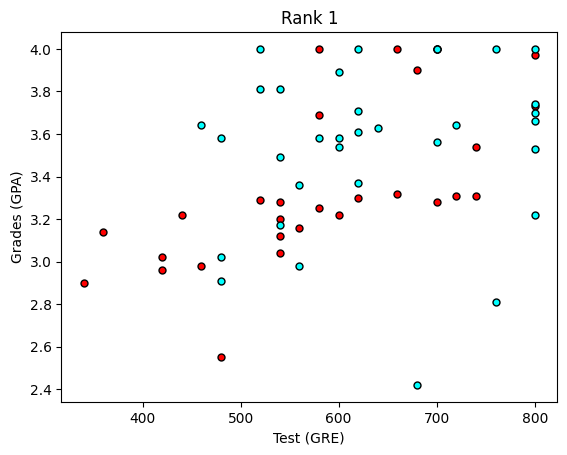

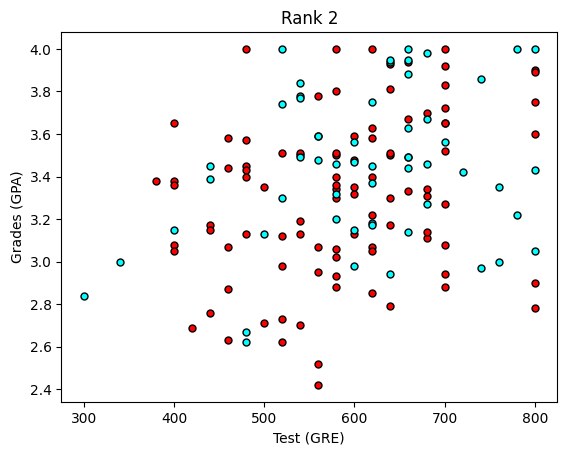

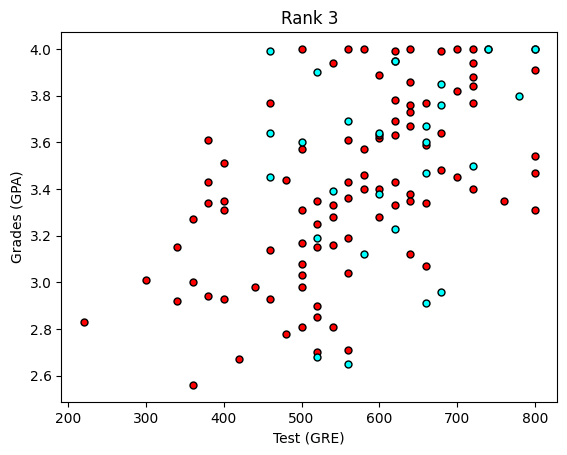

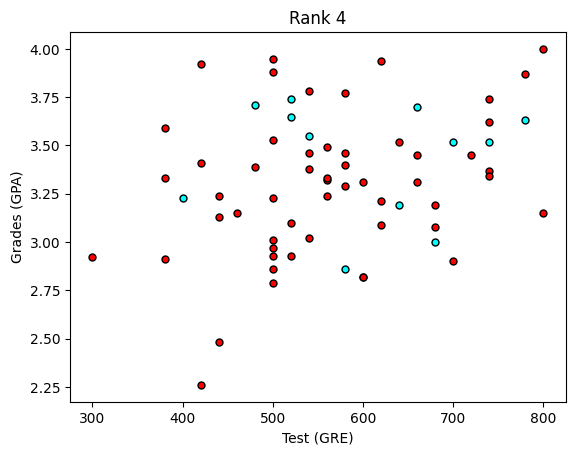

In [ ]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

# **Separating the Ranks:**

    data_rank1 = data[data["rank"]==1]
    data_rank2 = data[data["rank"]==2]
    data_rank3 = data[data["rank"]==3]
    data_rank4 = data[data["rank"]==4]

These lines of code are filtering the data DataFrame into separate subsets based on the value in the "rank" column.

data_rank1, data_rank2, data_rank3, and data_rank4 are new DataFrames containing rows where the "rank" column equals 1, 2, 3, and 4 respectively.



---


**Plotting the Graphs**

    plot_points(data_rank1)
    plt.title("Rank 1")
    plt.show()

    plot_points(data_rank2)
    plt.title("Rank 2")
    plt.show()

    plot_points(data_rank3)
    plt.title("Rank 3")
    plt.show()

    plot_points(data_rank4)
    plt.title("Rank 4")
    plt.show()

For each subset DataFrame

    (data_rank1, data_rank2, data_rank3, data_rank4)

    plot_points(data_rankX)

calls a function plot_points that presumably creates a scatter plot based on the "gre" and "gpa" columns from data_rankX.

    plt.title("Rank X")

sets the title of each plot to indicate the corresponding rank (X being 1, 2, 3, or 4).

    plt.show()

displays each plot sequentially.

**Purpose**

Data Separation: The snippet separates the original dataset data into different subsets based on the "rank" column values.

This allows for visual comparison of data points belonging to different ranks in separate plots.


---


**Visualization**

By plotting each subset separately, it becomes easier to analyze and compare the distribution or characteristics of data points across different ranks.

---
**Iterative Plotting**

The use of plt.show() after each plot ensures that each plot is displayed individually, allowing the viewer to focus on one rank at a time.

----
**Example Scenario**

If data represents a dataset of student admissions with columns "gre", "gpa", and "rank" where "rank" could denote the prestige level of the undergraduate institution (1 being the highest and 4 being the lowest), this snippet would generate four scatter plots.

Each scatter plot would visualize how "gre" and "gpa" vary across students admitted from institutions of different ranks.


---


**Summary**

Data Filtering

Separate DataFrames (data_rank1, data_rank2, etc.) are created based on the value in the "rank" column.

Visualization

Each subset DataFrame is plotted separately using plot_points, with titles indicating the rank being plotted.

Sequential Display

Plots are shown one by one using plt.show(), ensuring clarity and focus on each rank's data distribution.

In [ ]:
hot_encode = pd.concat([data, pd.get_dummies(data['rank'], prefix = 'rank')], axis = 1)
hot_encode = hot_encode.drop('rank', axis = 1)
hot_encode[:5]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,False,False,True,False
1,1,660,3.67,False,False,True,False
2,1,800,4.00,True,False,False,False
3,1,640,3.19,False,False,False,True
4,0,520,2.93,False,False,False,True


# **Concatenating DataFrames with One-Hot Encoding**

    hot_encode = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)


    pd.get_dummies(data['rank'], prefix='rank')
    
This function (pd.get_dummies) creates dummy variables from categorical data.

It takes data['rank'] as input, which is a categorical column, and creates a new DataFrame of dummy variables.

    prefix='rank'

specifies a prefix for the new columns that will be created from the dummy variables.

    pd.concat([...], axis=1)

This function concatenates two DataFrames along columns (axis=1).

    [data, pd.get_dummies(data['rank'], prefix='rank')]

Combines the original DataFrame data with the DataFrame of dummy variables created from data['rank'].

This results in a new DataFrame (hot_encode) where the original columns from data are followed by columns of dummy variables representing different ranks.

Dropping the Original Categorical Column:

    hot_encode = hot_encode.drop('rank', axis=1)

In [ ]:
processed_data = hot_encode[:]

processed_data['gpa'] = processed_data['gpa'] / processed_data['gpa'].max()
processed_data['gre'] = processed_data['gre'] / processed_data['gre'].max()

processed_data[:5]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,False,False,True,False
1,1,0.825,0.9175,False,False,True,False
2,1,1.000,1.0000,True,False,False,False
3,1,0.800,0.7975,False,False,False,True
4,0,0.650,0.7325,False,False,False,True


In [ ]:
sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.9), replace = False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Size of Training:", len(train_data))
print("Size of Testing:", len(test_data))

Size of Training: 360
Size of Testing: 40


# **Random Sampling Using np.random.choice**

    sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)

    np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)


Let's break it down:

    np.random.choice

is a NumPy function that randomly samples elements from a given array (processed_data.index in this case).

    size=int(len(processed_data)*0.9)

specifies the number of elements to sample, which is 90% of the length of processed_data.
replace=False ensures that each element is sampled only once (without replacement).


---


**Splitting Data into Training and Testing Sets**:

    train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)
    processed_data.iloc[sample]:

sample contains the randomly selected indices from processed_data.index.

processed_data.iloc[sample] selects rows from processed_data based on these indices, effectively creating the training dataset (train_data).

    processed_data.drop(sample):

processed_data.drop(sample) drops the rows specified by the indices in sample from processed_data, leaving the remaining rows as the testing dataset (test_data).


---


**Printing Sizes of Training and Testing Sets**


    print("Size of Training:", len(train_data))
    print("Size of Testing:", len(test_data))

    len(train_data) and len(test_data)

print the number of rows (or size) in the training and testing datasets, respectively.


---


**Purpose**

Random Sampling: np.random.choice is used to randomly select a subset of indices from processed_data.index for training data.

Data Splitting: The selected indices (sample) are used to split processed_data into training (train_data) and testing (test_data) datasets.

Evaluation: Printing the sizes of the training and testing datasets helps to verify that the split was performed correctly and ensures the sizes meet expectations.

----
**Example Scenario**

This snippet is commonly used in machine learning to split a dataset into training and testing sets.

The training set (train_data) is used to train a machine learning model, while the testing set (test_data) is used to evaluate the model's performance on unseen data.

----
**Summary**

Random Sampling: np.random.choice is used to randomly sample indices.

Data Splitting

The sampled indices are used to split the original dataset (processed_data) into training and testing datasets.

Verification

Printing the sizes of the datasets verifies the split and ensures the sizes are appropriate for subsequent analysis or modeling tasks.

In [ ]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']

test_features = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

In [ ]:
def error_formula(y, output):
    return -y*np.log(output) - (1-y) * np.log(1-output)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def error_term_formula(x, yhat, y):
    return (y - yhat)*x

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def error_formula(yhat, y):
    epsilon = 1e-10
    return - (y * np.log(yhat + epsilon) + (1 - y) * np.log(1 - yhat + epsilon))

def NN(features, targets, epochs=1000, lr=0.01):
    np.random.seed(42)
    n_records, n_features = features.shape

    # Initialize weights as a 2D array
    weights = np.random.normal(size=(n_features, 1))

    for epoch in range(epochs):
        del_w = np.zeros(weights.shape)

        for x, y in zip(features, targets):
            x = x.reshape(-1, 1)  # Reshape x to ensure it's a column vector
            yhat = sigmoid(np.dot(x.T, weights))  # Calculate prediction

            error_term = (yhat - y) * x  # Calculate error term

            del_w += error_term

        weights -= lr * del_w / n_records  # Update weights using gradient descent

        if epoch % (epochs // 10) == 0:
            out = sigmoid(np.dot(features, weights))  # Calculate final predictions
            loss = np.mean(error_formula(out, targets))  # Calculate cross-entropy loss

            print(f"Epoch: {epoch}")
            print(f"Training Loss: {loss}")
            print("===================")

    return weights

# Example usage
features = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
targets = np.array([0.1, 0.2, 0.3])

weights = NN(features, targets)


Epoch: 0
Training Loss: 0.7225427974242173
Epoch: 100
Training Loss: 0.7000480347356349
Epoch: 200
Training Loss: 0.6805277486671696
Epoch: 300
Training Loss: 0.6635780107946427
Epoch: 400
Training Loss: 0.6488429481898579
Epoch: 500
Training Loss: 0.6360125762123374
Epoch: 600
Training Loss: 0.6248191147882134
Epoch: 700
Training Loss: 0.6150325924828035
Epoch: 800
Training Loss: 0.6064562792729747
Epoch: 900
Training Loss: 0.598922281842375


# **1. Sigmoid Function**

    def sigmoid(x):
       return 1 / (1 + np.exp(-x))

**Purpose**

This function calculates the sigmoid activation function for a given input x.

**Functionality**

The sigmoid function squashes the input x to a range between 0 and 1, which is useful for binary classification tasks where the output represents probabilities.


---



**2. error_formula(yhat, y)**

    def error_formula(yhat, y):
       epsilon = 1e-10
       return - (y * np.log(yhat + epsilon) + (1 - y) * np.log(1 - yhat + epsilon))

**Purpose**

This function computes the cross-entropy loss between predicted yhat and true y labels.

Cross-entropy loss is a common loss function used in binary or multi-class classification tasks.

epsilon

This small value (1e-10) is added to yhat and 1 - yhat before taking the logarithm.

This prevents taking the logarithm of zero, which would cause undefined behavior.

np.log

Computes the natural logarithm of yhat + epsilon and 1 - yhat + epsilon.

Cross-entropy formula

When y = 1: Computes -y * np.log(yhat + epsilon).

This term penalizes the model more if yhat (predicted probability of class 1) is far from 1.

When y = 0

Computes -(1 - y) * np.log(1 - yhat + epsilon).

This term penalizes the model more if yhat (predicted probability of class 1) is far from 0.

Return value

Returns the negative sum of these terms, effectively calculating the cross-entropy loss.

----
**2. NN(features, targets, epochs=1000, lr=0.01)**

    def NN(features, targets, epochs=1000, lr=0.01):
      np.random.seed(42)
      n_records, n_features = features.shape

# Initialize weights as a 2D array

    weights = np.random.normal(size=(n_features, 1))

np.random.normal

This function generates random numbers from a normal (Gaussian) distribution.

Parameters:

    size=(n_features, 1)

Specifies the shape of the output array.

    n_features

Represents the number of features in your dataset.

1

Specifies that each weight should be a scalar (1-dimensional), making weights a column vector.

**Detailed Steps**

Initialization:

np.random.normal initializes the weights matrix (weights) with random values drawn from a normal distribution.

Each element in the weights matrix (n_features x 1 in shape) is randomly sampled from a Gaussian distribution with mean 0 and variance 1 by default (N(0, 1)).

Usage in Neural Networks:

In the context of neural networks, weights are crucial parameters that determine how input features are combined to produce output predictions.

Random initialization of weights helps in breaking the symmetry and allows the neural network to learn unique features during training.

Example:

Suppose n_features = 3, indicating that your input data has 3 features.

weights = np.random.normal(size=(3, 1)) will initialize a column vector with 3 random values, drawn from a normal distribution.

Example output

    array([[ 0.42680403], [-0.31871659], [ 0.84359657]])


Each value in this vector represents the initial weight associated with each feature in the neural network.

**Summary**

Purpose: Initializes the weights of a neural network with random values from a normal distribution.

Shape: size=(n_features, 1) ensures that each weight corresponds to a feature and is initialized as a column vector.

Importance: Proper initialization of weights is crucial for effective training and learning in neural networks, allowing them to converge to optimal solutions during the learning process.

----

    for epoch in range(epochs):
        del_w = np.zeros(weights.shape)
        
        for x, y in zip(features, targets):
            x = x.reshape(-1, 1)  # Reshape x to ensure it's a column vector
            yhat = sigmoid(np.dot(x.T, weights))  # Calculate prediction
            
            error_term = (yhat - y) * x  # Calculate error term
            
            del_w += error_term

        weights -= lr * del_w / n_records  # Update weights using gradient descent
        
        if epoch % (epochs // 10) == 0:
            out = sigmoid(np.dot(features, weights))  # Calculate final predictions
            loss = np.mean(error_formula(out, targets))  # Calculate cross-entropy loss
            
            print(f"Epoch: {epoch}")
            print(f"Training Loss: {loss}")
            print("===================")
    
    return weights

    Condition: epoch % (epochs // 10) == 0

This condition checks if the current epoch is a multiple of (epochs // 10).

Essentially, it means that the following block of code will execute every 10% of the total number of epochs.

For example, if epochs is 1000, (epochs // 10) is 100, so this block will execute at epochs 0, 100, 200, ..., 900.

    out = sigmoid(np.dot(features, weights))

Purpose

Calculate the predictions of the neural network using the current weights.

Explanation

    np.dot(features, weights)

Computes the dot product between the input features and the current weights, resulting in the raw scores (logits) for each input.

    sigmoid(...)

Applies the sigmoid activation function to these raw scores, converting them into probabilities (since sigmoid squashes the input to a range between 0 and 1).

Output

out is a vector of predicted probabilities corresponding to each input sample.

    loss = np.mean(error_formula(out, targets))

Purpose

Calculate the cross-entropy loss to evaluate the performance of the neural network at the current epoch.

Explanation:

    error_formula(out, targets)

Computes the cross-entropy loss for each predicted probability (out) against the true target values (targets).

    np.mean(...)

Averages the computed loss values to obtain the mean cross-entropy loss over all samples.

Output

loss is a single scalar value representing the average loss for the current epoch.

    print(f"Epoch: {epoch}")

and

    print(f"Training Loss: {loss}")

Purpose

Print the current epoch number and the corresponding training loss to the console for monitoring and debugging purposes.

Explanation:

    f"Epoch

{epoch}"

Uses an f-string to format and print the current epoch number.

f"Training Loss

{loss}": Uses an f-string to format and print the computed training loss.

Output

These print statements provide a way to track the training progress and see how the loss is decreasing (hopefully) over time.

    print("===================")

Purpose

Print a separator line to make the console output more readable.

Explanation

Prints a line of equal signs to visually separate the output for different epochs, making it easier to follow the training log.

Output

This line is printed to the console for better readability.

    return weights

Purpose

Return the final weights of the neural network after all epochs of training are completed.

Explanation:

After the training loop, the function returns the learned weights.

These weights are the parameters of the neural network that have been adjusted to minimize the loss function.

Output

The returned weights can be used for making predictions on new data or for further analysis.

This snippet is part of a neural network training loop. It periodically (every 10% of the total epochs) calculates and prints the current training loss to monitor the training progress. The final weights of the network are returned at the end of the training process.

-----

Purpose

This function trains a simple neural network using gradient descent with the cross-entropy loss as the optimization criterion.

Explanation:

Initialization:
Sets a seed for reproducibility (np.random.seed(42)).

Retrieves the number of records (n_records) and number of features (n_features) from the input features.

Initializes weights randomly using a normal distribution with shape (n_features, 1).

This initializes weights as a column vector suitable for matrix operations.

Training Loop (epochs iterations):

del_w is initialized as zeros with the same shape as weights. This variable accumulates gradients over each epoch.

Iterates over each data point (x, y) in features and targets using zip(features, targets).

Reshapes x to ensure it's a column vector (x.reshape(-1, 1)).

Computes yhat, the predicted output using the current weights (np.dot(x.T, weights) followed by sigmoid).

Calculates error_term as (yhat - y) * x, which is the gradient of the cross-entropy loss with respect to weights.

Updates del_w by adding error_term, accumulating gradients for each data point.

Weight Update:

After looping through all data points for the current epoch, updates weights using the accumulated gradients (del_w). The learning rate (lr) controls the step size of these updates.

Logging and Monitoring:

Every 10% of epochs (if epoch % (epochs // 10) == 0), computes out (final predictions) using the current weights.

Calculates loss by averaging the cross-entropy loss computed by error_formula between out and targets.

Prints the current epoch and training loss for monitoring the training progress.

Returns:

Finally, returns the trained weights after completing all epochs.

-----
**Summary**

This code snippet implements a neural network training function (NN) using gradient descent with cross-entropy loss.

The error_formula function computes the cross-entropy loss between predicted outputs (yhat) and true labels (y).

This setup is suitable for binary classification tasks where the output represents probabilities of belonging to a particular class (usually 0 or 1).

Adjustments may be needed based on specific dataset characteristics or requirements of the neural network architecture being implemented.










In [ ]:
# Assume test_features and weights are given as:
test_features = np.random.rand(40, 6)  # 40 samples, 6 features
weights = np.random.normal(size=(6, 1))  # Should match the number of features

# Example test_targets for demonstration (assuming binary classification)
targets_test = np.random.randint(0, 2, size=(40, 1))

# Calculate predictions
test_out = sigmoid(np.dot(test_features, weights))

# Binarize predictions based on a threshold of 0.5
predictions = test_out > 0.5

# Calculate accuracy
accuracy = np.mean(predictions == targets_test)

print("Accuracy: ", accuracy)


Accuracy:  0.45


# Final Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("/content/Iris.csv")
iris = iris.sample(frac=1).reset_index(drop=True)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,82,5.5,2.4,3.7,1.0,Iris-versicolor
1,150,5.9,3.0,5.1,1.8,Iris-virginica
2,61,5.0,2.0,3.5,1.0,Iris-versicolor
3,126,7.2,3.2,6.0,1.8,Iris-virginica
4,75,6.4,2.9,4.3,1.3,Iris-versicolor
...,...,...,...,...,...,...
145,114,5.7,2.5,5.0,2.0,Iris-virginica
146,60,5.2,2.7,3.9,1.4,Iris-versicolor
147,139,6.0,3.0,4.8,1.8,Iris-virginica
148,39,4.4,3.0,1.3,0.2,Iris-setosa


In [3]:
X = iris[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
X = np.array(X)
X[:5]

array([[5.5, 2.4, 3.7, 1. ],
       [5.9, 3. , 5.1, 1.8],
       [5. , 2. , 3.5, 1. ],
       [7.2, 3.2, 6. , 1.8],
       [6.4, 2.9, 4.3, 1.3]])

# Converting DataFrame to NumPy Array:

    X = np.array(X)

This line converts the DataFrame X into a NumPy array. The np.array() function takes an array-like object (in this case, a DataFrame) and returns a NumPy array.


---


# Reasons for Conversion

## Performance

NumPy arrays can be more efficient in terms of memory and computational speed compared to DataFrames, especially for numerical operations.

## Compatibility

Some libraries and functions, especially those related to machine learning and scientific computing, may require or perform better with NumPy arrays.

For example, many functions in libraries like scikit-learn expect input in the form of NumPy arrays.
Operations and Broadcasting:

NumPy arrays support a wide range of operations and broadcasting rules that make element-wise operations and mathematical computations straightforward and efficient.

##Indexing and Slicing

NumPy arrays allow more flexible and efficient indexing and slicing operations compared to DataFrames, which can be beneficial for certain types of data manipulation and analysis

In [4]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False)

Y = iris.Species
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1,1))
Y[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Vector Sparcity

The **sparse=False** parameter in the OneHotEncoder class from the sklearn.preprocessing module controls the format of the output array.



---



## Explanation of sparse=False

###OneHotEncoder
The OneHotEncoder is used to convert categorical variables into a form that can be provided to machine learning algorithms to do a better job in prediction.

This is called one-hot encoding.

###sparse Parameter
sparse=True (default)

When sparse=True, the output of the OneHotEncoder is a sparse matrix.

Sparse matrices are memory-efficient representations of data where most elements are zero.

They are useful for large datasets with many categories because they save space by not storing the zeros.

Sparse matrices are instances of scipy.sparse classes like csr_matrix.

###sparse=False:

When sparse=False, the output of the OneHotEncoder is a dense NumPy array. Dense arrays store all elements explicitly, including zeros.
This can be more intuitive and easier to work with for small to medium-sized datasets where memory efficiency is not as critical.

#One Hot Encoding of Categorical Values


---


    np.array(Y)

###Purpose

Converts Y into a NumPy array.

###Context

 Y is likely to be a Pandas Series or a list that contains categorical data, such as species names in the Iris dataset.

----
###Reshape Y
    reshape(-1, 1)

###Purpose

Reshapes the NumPy array into a 2D array with a single column.

###Context

Y was a 1D array (a single column vector), and reshape(-1, 1) converts it to a 2D array where each element of Y is in its own row.

The -1 indicates that the number of rows should be inferred from the length of Y.

----
###Fit & Transform Y

    one_hot_encoder.fit_transform(...)

###Purpose

Fits the OneHotEncoder to the data and transforms the data in one step.

###Context

The fit_transform method of OneHotEncoder does two things:
Fit: Learns the unique categories in Y and assigns a binary column to each category.

###Transform

Converts the original categorical values in Y to one-hot encoded vectors.

---

##What is One-Hot Encoding?

One-hot encoding is a process where categorical variables are converted into a binary matrix. Each category is represented by a unique binary vector with all elements as 0 except for a single 1 indicating the presence of that category.

----
##Example

Let's illustrate this with a small example.

Suppose Y contains three species of flowers:

     ['setosa', 'versicolor', 'virginica', 'setosa', 'virginica'].

np.array(Y) converts it to a NumPy array:

    np.array(['setosa', 'versicolor', 'virginica', 'setosa', 'virginica'])

reshape(-1, 1) changes it to:

       array([['setosa'],
              ['versicolor'],
              ['virginica'],
              ['setosa'],
              ['virginica']])

one_hot_encoder.fit_transform(...) performs one-hot encoding.

The unique categories are:

    setosa
    versicolor
    virginica

The transformation will look like this:

    array([[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.],
           [1., 0., 0.],
           [0., 0., 1.]])

Detailed Breakdown of One-Hot Encoding Process

###Fitting (fit):

The encoder scans through the data and identifies the unique categories.

It assigns each category an index:

    setosa: index 0
    versicolor: index 1
    virginica: index 2
    Transforming (transform):

Each category is converted to a one-hot encoded vector based on its index:

    setosa: [1, 0, 0]
    versicolor: [0, 1, 0]
    virginica: [0, 0, 1]

Full Process in Your Code

###Y = iris.Species  # Assuming 'iris.Species' contains categorical data like species names

###Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1,1))  # Convert to one-hot encoded matrix

###Y[:5]  # Display the first 5 rows of the encoded matrix

-----

This process ensures that the categorical data in Y is converted into a binary matrix suitable for use in machine learning models, which generally cannot handle categorical data directly.

The fit_transform method does it all in one step, making the code more concise and efficient.








# **Reshape the Array**

    np.array(Y).reshape(-1, 1)
    reshape(-1, 1)

changes the shape of the array to have one column and as many rows as needed to accommodate all elements.

-1 is used to automatically calculate the number of rows based on the length of Y.

Essentially, this ensures that Y is reshaped into a column vector.

For example, if Y has 150 elements, it will be reshaped into a 150x1 array.

Fit and Transform using OneHotEncoder:
   
    one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))

fit_transform is a method from the OneHotEncoder class in Scikit-learn.

It first fits the encoder on the data (learns the unique categories) and then transforms the data into a one-hot encoded format.

One-hot encoding converts categorical labels into a binary matrix.

Each category is represented by a binary vector, where only the position corresponding to the category is 1, and all other positions are 0.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

# Split the Data into Training, Test and Validation segments


---


##First Split:

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

###Purpose

This line splits the dataset into training + validation set and test set.

test_size=0.15: 15% of the data is assigned to the test set.

X_train: 85% of the features data for training + validation.

X_test: 15% of the features data for testing.

Y_train: 85% of the target labels for training + validation.

Y_test: 15% of the target labels for testing.

-----
##Second Split

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

##Purpose

This line further splits the combined training + validation set into separate training and validation sets.

test_size=0.1: 10% of the training + validation data is assigned to the validation set.

Since this split is performed on the remaining 85% of the data (from the first split), the resulting validation set will be 10% of 85%, which is 8.5% of the original dataset.

X_train: Approximately 76.5% of the original features data for training (85% of 85%).

X_val: Approximately 8.5% of the original features data for validation (10% of 85%).

Y_train: Approximately 76.5% of the original target labels for training.
Y_val: Approximately 8.5% of the original target labels for validation.

----

##Summary

##Training Set (X_train, Y_train): Approximately 76.5% of the original dataset.

##Validation Set (X_val, Y_val): Approximately 8.5% of the original dataset.

##Test Set (X_test, Y_test): 15% of the original dataset.

This way, the dataset is effectively partitioned into three subsets: training, validation, and test, allowing you to train the model on the training set, tune hyperparameters and validate performance on the validation set, and finally evaluate the model's performance on the test set.

In [7]:
Y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [ ]:
def initWeights(nodes):
    layers, weights = len(nodes), []

    for i in range(1, layers):
        w = [[np.random.uniform(-1,1)
          for k in range(nodes[i-1] + 1)]
          for j in range(nodes[i])]
        weights.append(np.matrix(w))

    return weights

#Initializing the NN Weight

----
##nodes

nodes is a list where each element represents the number of nodes (neurons) in a corresponding layer of the neural network.

##Example

    nodes = [3, 5, 2]

the network has 3 input nodes, 5 nodes in the first hidden layer, and 2 output nodes.

-----
##Initialization

layers is set to the length of nodes, which is the number of layers in the network.

weights is an empty list that will store the weight matrices for each layer.

-----

##Outer Loop (i loop):

    for i in range(1, layers)

This loop iterates over the range from 1 to layers-1. This means it starts from the first hidden layer

##(i.e., skips the input layer) and goes to the last layer.

##i represents the current layer

for which we are initializing weights.

-----

##Inner Loop (j loop)

    for j in range(nodes[i])

This loop iterates over the number of nodes in the current layer (nodes[i]).

###j represents the index of the current node in the current layer.


##Weight Initialization

    for k in range(nodes[i-1] + 1)

This innermost loop iterates over the number of nodes in the previous layer C, plus one for the bias term.

k represents the index of the current node in the previous layer plus the bias term.

    np.random.uniform(-1, 1)

This generates a random weight from a uniform distribution between -1 and 1.

    [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]

i-1 refers to the index of the previous layer.

nodes[i-1] gives the number of nodes in the previous layer.


    nodes[i-1]:

i-1 refers to the index of the previous layer.

nodes[i-1] gives the number of nodes in the previous layer.

The weights for each node in the current layer need to connect to every node in the previous layer plus an additional weight for the bias term.


    for k in range(nodes[i-1] + 1)

This loop iterates over the number of nodes in the previous layer (nodes[i-1]) and includes an extra iteration for the bias term (+ 1).

    for j in range(nodes[i])]

This creates a list of lists, where each inner list contains the weights for one node in the current layer, connecting it to all nodes in the previous layer plus the bias term.

----
##Appending Weights

    weights.append(np.matrix(w))

After constructing the weight matrix for the current layer, it is converted to a numpy matrix and appended to the weights list.
----

##Visual Example

Let's take an example with nodes = [2, 3, 1]:

2 input nodes

3 nodes in the first hidden layer

1 output node

##First Hidden Layer (i = 1)

We need to initialize weights for 3 nodes in the first hidden layer.
Each of these 3 nodes will have weights connecting to 2 input nodes + 1 bias term.

for j in range(nodes[1]): Iterates 3 times (for the 3 nodes in the first hidden layer).

for k in range(nodes[0] + 1): Iterates 3 times (for the 2 input nodes + 1 bias term).

The weight matrix w for the first hidden layer will look something like:

    [
      [w11, w12, w13],  # Weights for the 1st node in the hidden layer
      [w21, w22, w23],  # Weights for the 2nd node in the hidden layer
       [w31, w32, w33]   # Weights for the 3rd node in the hidden layer
    ]

----
##Output Layer (i = 2)

We need to initialize weights for 1 node in the output layer.
This node will have weights connecting to 3 nodes in the hidden layer + 1 bias term.

    for j in range(nodes[2])

Iterates 1 time (for the 1 node in the output layer).

    for k in range(nodes[1] + 1)

Iterates 4 times (for the 3 hidden nodes + 1 bias term).
The weight matrix w for the output layer will look something like:

    [
      [w41, w42, w43, w44]  # Weights for the 1 node in the output layer
    ]

----
##Summary

The j loop iterates over each node in the current layer, creating a set of weights for connections from all nodes in the previous layer plus a bias term.

This construction ensures that each node in a layer is connected to every node in the previous layer, including a bias term, with randomly initialized weights.










In [8]:
def feedForward(x, weights, layers):
    activations, layer_input = [x], x

    for j in range(layers):
        activation = sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation)

    return activations

# Feedforwad function

The feedForward function performs the forward propagation step in a neural network.

Given an input x, it computes the activations of each layer in the network using the provided weights and returns these activations.

# Parameters:

     x

##The input vector to the network.


    weights

A list of weight matrices for each layer in the network.

Each weight matrix has dimensions appropriate for its layer (as initialized in the previous snippets).

    layers

The number of layers in the network (excluding the input layer).

#Steps:

##1. Initialization:

    activations, layer_input = [x], x

##activations

      [x]

A list that will store the activations of each layer, starting with the input x.

##the [x] and x represent how the initial input data x is stored and used in the feedforward process. Let's break it down step by step:

----
##Function Definition

    def feedForward(x, weights, layers)

This function takes the input x, the weights of the network, and the number of layers.

##Input x

x is the input data for the neural network.

##It can be a vector or a matrix depending on how many data points you have.

##Initial Activation

    activations, layer_input = [x], x

activations is a list that will store the output (activation) of each layer.

layer_input is used to keep track of the current input to each layer.
Understanding [x] and x:

    [x]

This creates a list with x as its first element. This is used to store the activations of all layers starting with the input layer.

This list will grow as the feedforward process progresses through each layer, storing each layer's output.


    x

This is simply assigning the input x to the variable layer_input to start the feedforward process.

----------
##Why Use [x] and x?

     [x]

This is used to initialize the activations list with the input layer's activations.

##The input itself is considered as the first activation.

This allows us to keep track of the input and all subsequent activations (outputs of each layer) in a single list.

      x

This is used to pass the initial input data through the network.

As the network processes each layer, layer_input will be updated to the output of the current layer, which then becomes the input to the next layer.

--------
##Example

Let's assume x is a 2-dimensional input vector, and we have a simple neural network with one hidden layer and one output layer.

###Initialization

x is the input vector, say x = [1.0, 0.5].

activations is initialized as [x], so activations = [[1.0, 0.5]].

layer_input is initialized as x, so layer_input = [1.0, 0.5].

###First Hidden Layer

    activation = sigmoid(np.dot(layer_input, weights[0].T))

Compute the activation using the weights of the first hidden layer.
Update activations to include this new activation.

###Output Layer

layer_input is now the activation of the hidden layer.

Compute the activation for the output layer using weights[1].

Update activations to include the output layer's activation.

----------------
---------------
##Why np.append(1, activation)?

    layer_input = np.append(1, activation)

Neural networks often use a bias term in each layer.

The bias term allows the activation function to be shifted and helps in fitting the data better.

To include the bias in the calculation for the next layer, we need to augment the activation with a bias term.

Here, 1 represents the bias term.

    np.append(1, activation)

    layer_input = np.append(1, activation)

Appending 1

Adds a bias term to the beginning of the activation array.

This ensures that when we calculate the dot product with the weights for the next layer, the bias term is included in the computation

appends the bias term (1) to the beginning of the activation array, making it ready to be used as input (layer_input) for the next layer's weight matrix.

In neural networks, the bias term is typically represented as a constant input of 1, but it can technically be any constant value.

##The key idea is that the bias term is a constant value added to the weighted sum of inputs to a neuron before applying the activation function. Here's a more detailed explanation:

##Purpose of the Bias Term

###Shift the Activation Function

The bias term allows the activation function to shift its output, enabling the model to fit the data better by adjusting the decision boundary.
Flexibility in Learning: By introducing a bias, the neuron can learn a wider range of functions. Without the bias, the neuron would always output zero if all inputs were zero, limiting its flexibility.

##Why Use 1?

Simplicity and Standard Practice: Using 1 as the bias term is a standard practice because it simplifies the mathematics and implementation of neural networks.

It's a straightforward way to ensure that the bias is always present in the computation.

Effectiveness

A bias term of 1 has been found to work effectively in practice for various neural network architectures and tasks.
Could the Bias Be Any Other Number?

Yes, It Could: The bias could technically be any constant value. The essential requirement is that the bias term is a constant input that the neuron can use to adjust its activation.

Learning the Bias: In practice, the value of the bias term itself is not fixed. During the training process, the bias weight is adjusted just like the other weights in the network. The initial constant value (typically 1) is multiplied by a weight that is learned during training
.
Example with Different Bias Values
Let's consider an example where the bias term is set to a different constant value:

Bias Term of 0.5:

    layer_input = np.append(0.5, activation)

Bias Term of -1:

    layer_input = np.append(-1, activation)

In both cases, the network would still function, but the initial shift applied by the bias would be different.

The weight associated with the bias term would be adjusted during training to find the optimal value.


##Practical Considerations
###Impact on Training

The choice of the initial constant value for the bias term may have some impact on the convergence and training dynamics, but typically this is minor. The network will adjust the bias weight during training to find the optimal configuration.

##Initialization

In most implementations, the bias term is initialized as 1 because it is a straightforward and effective approach. The bias weight associated with this term is learned and updated during training.

##Summary

The bias term is a constant value added to the weighted sum of inputs to a neuron.

Using 1 as the bias term is a standard practice, but any other constant value could technically be used.

The bias term allows the network to shift the activation function and learn a wider range of functions.

During training, the weight associated with the bias term is adjusted to optimize the network's performance.


-------
##Example

Consider a simple scenario where the network has 1 hidden layer and 1 output layer.

Input

    x: [0.5, 0.2]

Weights

For hidden layer (3 hidden neurons, including bias)

    [[w11, w12], [w21, w22], [w31, w32]]

For output layer (1 output neuron, including bias): [[wo1, wo2, wo3]]

##Step-by-Step Execution

###Initialization:

    x = [0.5, 0.2]
    activations = [[0.5, 0.2]]
    layer_input = [0.5, 0.2]


###First Layer (Hidden Layer)

Calculate Activation

    activation = sigmoid(np.dot([0.5, 0.2, 1], weights[0].T))

Note: layer_input will be [0.5, 0.2, 1] after the append operation.

Store Activation

    activations.append(activation)

Prepare for Next Layer

    layer_input = np.append(1, activation)

----
Suppose activation is [0.7, 0.8, 0.6] (for simplicity).

layer_input becomes [1, 0.7, 0.8, 0.6].

Second Layer (Output Layer):

Calculate Activation:

activation = sigmoid(np.dot([1, 0.7, 0.8, 0.6], weights[1].T))


Store Activation

    activations.append(activation)

Visual Explanation

To visualize, let's consider a simple example where x is an input to a neural network with one hidden layer and one output layer.

Input Layer: [x1, x2]

Hidden Layer

Without Bias Term

input to hidden = [x1, x2]

weights for hidden layer = [[w11, w12], [w21, w22], [w31, w32]]

With Bias Term

input to hidden = [1, x1, x2]

weights for hidden layer = [[b1, w11, w12], [b2, w21, w22], [b3, w31, w32]]

Here, b1, b2, b3 are the bias weights.

By appending 1 to the activation from the previous layer, the feedforward process includes the bias term in the calculation for the next layer, ensuring that each neuron's activation is correctly adjusted by its bias.

----

##Summary

    layer_input = np.append(1, activation)

ensures that the bias term is included in the input for the next layer.

This bias term is essential for the neural network to learn accurately, as it allows the model to fit the data better by shifting the activation function.
This snippet shows how to implement a basic feedforward neural network with bias terms, ensuring that the bias is always considered in each layer's calculations.

---------
---------
##Full Code Example with Comments:

    import numpy as np

    def sigmoid(x):
       return 1 / (1 + np.exp(-x))

    def feedForward(x, weights, layers):
        # Initialize the activations list with the input x and set layer_input to x
        activations, layer_input = [x], x
    
    for j in range(layers):
        # Compute the activation for the current layer
        activation = sigmoid(np.dot(layer_input, weights[j].T))
        
        # Append the activation to the activations list
        activations.append(activation)
        
        # Update layer_input to the activation of the current layer and add bias term
        layer_input = np.append(1, activation)
    
    return activations

----

# Example usage:

##Define input x

    x = np.array([1.0, 0.5])

# Define weights for a network with 1 hidden layer and 1 output layer

    weights = [
              np.random.uniform(-1, 1, (3, 2)),  # Weights for layer 1 (2 input nodes + 1 bias to 3 hidden nodes)
              np.random.uniform(-1, 1, (1, 4))   # Weights for layer 2 (3 hidden nodes + 1 bias to 1 output node)
]

# Perform feedforward operation
activations = feedForward(x, weights, layers=2)

print("Activations of all layers:", activations)

##Initialization

    activations = [x]

##Starts with the input layer's activations

    layer_input = x

Sets the initial input for the feedforward process.

##Loop Through Layers

For each layer, compute the activation and update the list of activations.

##Return

The function returns the list of activations for all layers, including the input layer.
In summary, [x] initializes the list of activations with the input, and x is used as the current input to the layers during the feedforward process. This approach ensures that you have a record of the input and all subsequent activations in the network.


    layer_input

A variable to keep track of the current input to each layer, initially set to the input x.

##2. Loop Through Layers:

      for j in range(layers):

This loop iterates over each layer in the network.

##3. Compute Activation:

    activation = sigmoid(np.dot(layer_input, weights[j].T))

    np.dot(layer_input, weights[j].T):

Calculates the dot product of the current layer's input (layer_input) with the transpose of the weight matrix for the current layer (weights[j].T).

This computes the weighted sum of inputs for each neuron in the layer.
sigmoid(...):

Applies the sigmoid activation function to the weighted sum to get the activations of the neurons in the current layer.

----------

##4. Store Activation and Update Input:

     activations.append(activation)
     layer_input = np.append(1, activation)
     activations.append(activation):
     
Adds the current layer's activations to the activations list.

np.append(1, activation): Adds a bias term (1) to the activations of the current layer. This new array becomes the input (layer_input) for the next layer.

-----------

##5. Return Activations:

    return activations

Returns the list of activations for all layers, including the input layer.

---
##Example

Consider a simple neural network with the following configuration:

Input layer with 2 nodes.

One hidden layer with 3 nodes.

Output layer with 1 node.

Given an input vector x of shape (2,), and weights initialized as follows:

    weights[0] of shape (3, 3) for the hidden layer (including bias).

weights[1] of shape (1, 4) for the output layer (including bias).

The feedForward function will:

Compute the activations of the hidden layer by applying the sigmoid function to the weighted sum of inputs.

Append a bias term to these activations and pass them as input to the next layer.
Compute the activation of the output layer using the sigmoid function.

Return the activations for all layers.
Intuition:

    Input Layer

Takes the initial input x.

    Hidden Layer(s)

Each hidden layer receives inputs (activations) from the previous layer, calculates the weighted sum, applies the activation function, and passes the result (with a bias term) to the next layer.

    Output Layer

The final layer computes the final output of the network.

This process mimics how information flows through a neural network during the forward pass, enabling the network to make predictions based on the input x.

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidDerivative(x):
    return np.multiply(x, 1-x)

# Sigmoid Function

The sigmoid function is a common activation function used in neural networks.

It maps any real-valued number to a value between 0 and 1, which is useful for transforming the output of a neuron into a probability.

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))



---


##Input

The function takes a single input x, which can be a number, a NumPy array, or any array-like structure.

##Computation

The sigmoid function is defined mathematically as:
![image.png]()

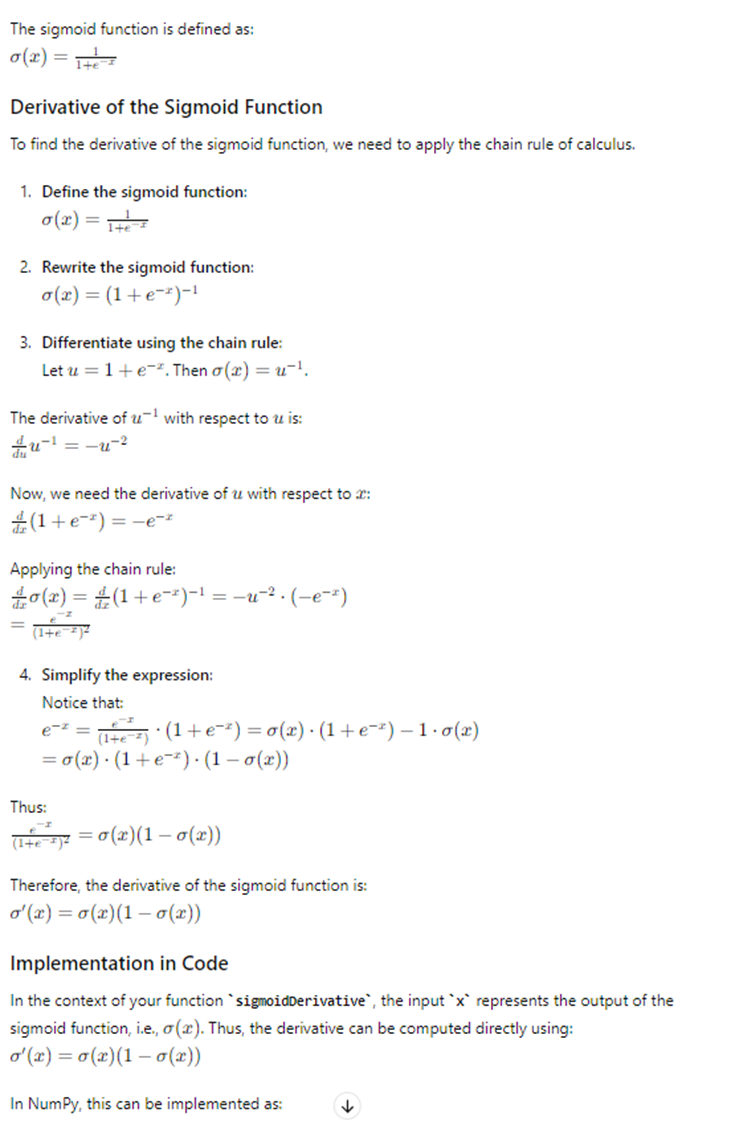

np.exp(-x): Computes the exponential of -x.
1 + np.exp(-x): Adds 1 to the exponential result.
1 / (1 + np.exp(-x)): Takes the reciprocal of the above sum, resulting in a value between 0 and 1.
Output: Returns the computed sigmoid value.
Sigmoid Derivative Function
The derivative of the sigmoid function is used during the backpropagation process in neural networks. It helps in computing the gradient, which is necessary for updating the weights.

    def sigmoidDerivative(x):
       return np.multiply(x, 1 - x)

Input

The function takes a single input x, which is assumed to be the output of the sigmoid function.

Computation

The derivative of the sigmoid function
$$𝜎
(
𝑥
)$$
σ(x) is given by:

$$𝜎
′
(
𝑥
)
=
𝜎
(
𝑥
)
⋅
(
1
−
𝜎
(
𝑥
)
)
σ
′
 (x)=σ(x)⋅(1−σ(x))$$

----
    np.multiply(x, 1 - x)

    x = the sigmoid

Element-wise multiplication of x and (1 - x).

Output

Returns the computed derivative value.
Usage Context

----
##Forward Propagation

During the forward pass in a neural network, the sigmoid function is applied to the weighted sum of inputs to produce the activation of a neuron.

---
##Backward Propagation

During the backward pass, the sigmoidDerivative function is used to compute the gradient of the loss with respect to the neuron's input. This gradient is then used to update the weights of the network.

----
##Example##

Here's a simple example demonstrating how these functions might be used in a neural network context:

import numpy as np

# Example input

    x = np.array([1.0, 2.0, 3.0])

# Forward pass: compute the sigmoid activation

    activation = sigmoid(x)

    print("Sigmoid Activation:", activation)

----
# Backward pass: compute the sigmoid derivative

gradient = sigmoidDerivative(activation)

print("Sigmoid Derivative:", gradient)


Output:

##Sigmoid Activation

[0.73105858 0.88079708 0.95257413]


Sigmoid Derivative: [0.19661193 0.10499359 0.04517666]

-----
##Summary


The sigmoid function transforms its input into a value between 0 and 1.
The sigmoidDerivative function calculates the derivative of the sigmoid function, which is used during the backpropagation process to adjust the weights of the neural network.

These functions are fundamental to the operation of many neural network architectures, especially in binary classification tasks.

In [10]:
def backPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal)

    for j in range(layers, 0, -1):
        currentActivation = activations[j]

        if(j>1):
            prevActivation = np.append(1, activations[j-1])
        else:
            prevActivation = activations[0]

        delta = np.multiply(error, sigmoidDerivative(currentActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w)

    return weights


In [ ]:
def train(X, Y, lr, weights):
    layers = len(weights)

    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1,x))
        activations = feedForward(x, weights, layers)
        weights = backPropagation(y, activations, weights, layers)

    return weights

In [ ]:
def predict(item, weights):
    layers = len(weights)
    item = np.append(1, item)

    activations = feedForward(item, weights, layers)
    output = activations[-1].A1
    max_index = np.argmax(output)

    yhat = [0 for i in range(len(output))]
    yhat[max_index] = 1

    return yhat

In [ ]:
def accuracy(X, Y, weights):
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = predict(x, weights)
        if(y == guess):
            correct += 1
    return correct/len(X)

In [ ]:
def NeuralNetwork(X_train, Y_train, X_val = None, Y_val = None, epochs = 10, nodes = [], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = initWeights(nodes)

    for epoch in range(epochs+1):
        weights = train(X_train, Y_train, lr, weights)

        if(epoch%20 == 0):
            print("Epoch:", epoch)
            print("Training Accuracy:", accuracy(X_train, Y_train, weights))
            print("Validation Accuracy:", accuracy(X_val, Y_val, weights))

    return weights

In [ ]:
num_of_features = len(X[0])
num_of_outputs = len(Y[0])

layers = [num_of_features, 5, 8, num_of_outputs]
lr, epochs = 0.15, 100

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs = epochs, nodes = layers, lr = lr)

Epoch: 0
Training Accuracy: 0.34210526315789475
Validation Accuracy: 0.15384615384615385
Epoch: 20
Training Accuracy: 0.9210526315789473
Validation Accuracy: 0.8461538461538461
Epoch: 40
Training Accuracy: 0.8771929824561403
Validation Accuracy: 0.7692307692307693
Epoch: 60
Training Accuracy: 0.9298245614035088
Validation Accuracy: 0.8461538461538461
Epoch: 80
Training Accuracy: 0.9385964912280702
Validation Accuracy: 0.8461538461538461
Epoch: 100
Training Accuracy: 0.9473684210526315
Validation Accuracy: 0.8461538461538461


In [ ]:
print("Testing Accuracy:", accuracy(X_test, Y_test, weights))

Testing Accuracy: 1.0
